In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA



[0 0 0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


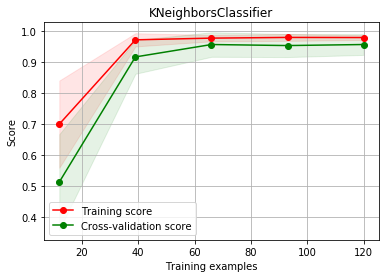

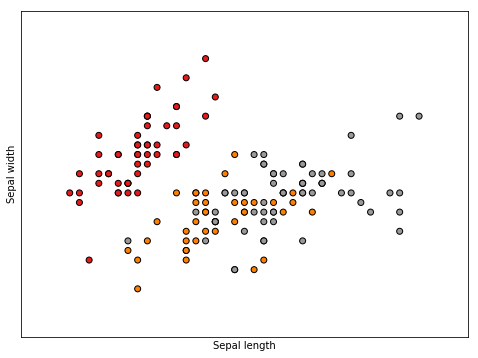

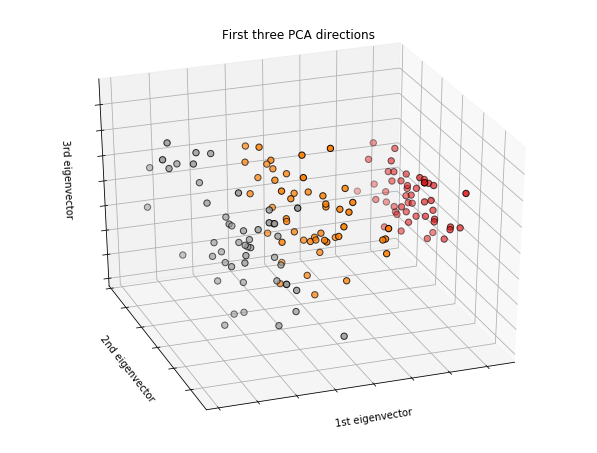

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#Iris
#Метод к ближацших соседей

#clf =KNeighborsClassifier(n_neighbors=3)
#partial=clf.fit(X, Y)
#print(partial)


data = load_iris()
X=data.data
Y=data.target
clf =KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)
print(clf.predict(X[:7]))
print((X[:7]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


# График
X = data.data[:, :2]  # берем только первые две функции
Y= data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(8, 6))
plt.clf()

# График тренировочных точек
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# построение первых трёх измерений 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

-25.367102973999653
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
[-39.40309599 -38.55516126 -39.22616779 -36.68872545 -35.64504893
 -35.47162639 -35.28986517 -39.94653553 -39.24953834 -37.07412897]


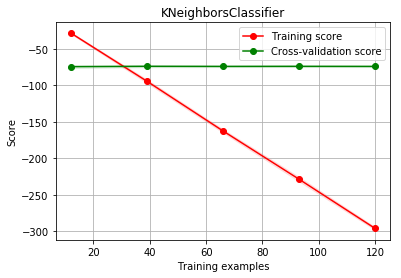

In [24]:
#Метод парзеновского окна

from sklearn.neighbors import KernelDensity

clf=KernelDensity()
clf.fit(X,Y)
print(clf.score(X[:10]))
print((X[:10]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KernelDensity")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


[-0.00989287  0.12398676 -0.00587675  0.00440567 -0.01392449]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[ 0.          0.          0.         -0.57470559  0.          0.
 -0.04225004  0.          0.          0.        ]


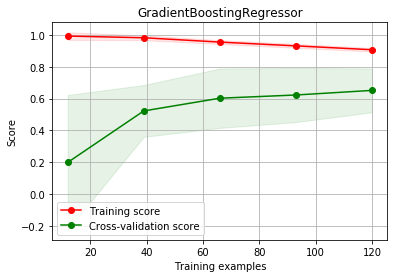

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Метод потенциальных функций

clf=GradientBoostingRegressor()
clf.fit(X,Y)
print(clf.predict(X[:5]))
print((X[:5]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("GradientBoostingRegressor")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


[-0.00989287  0.12398676 -0.00587675  0.00440567 -0.01392449]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[ 0.          0.          0.         -0.57826495  0.          0.
 -0.04225232  0.          0.          0.        ]


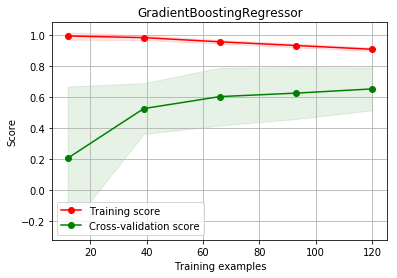

In [28]:
#Алгоритм STOLP для отбора эталонных объектов

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Titanic scatter


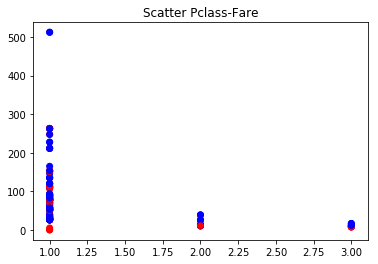

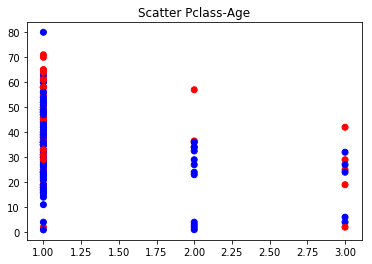

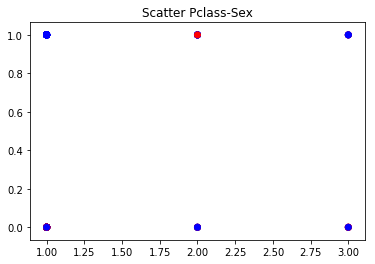

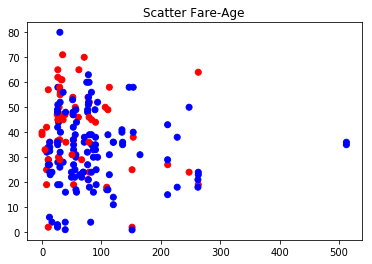

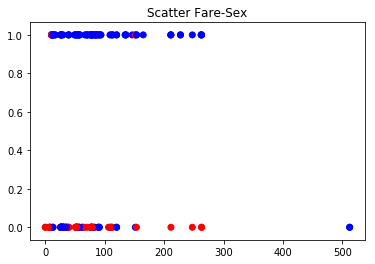

[1 1 1 1 0 1 1]
    Pclass     Fare   Age  Sex
1        1  71.2833  38.0    1
3        1  53.1000  35.0    1
6        1  51.8625  54.0    0
10       3  16.7000   4.0    1
11       1  26.5500  58.0    1
21       2  13.0000  34.0    0
23       1  35.5000  28.0    0
Do they survived?
[1 1 1 1 0]
    Pclass      Fare   Age  Sex
21       2   13.0000  34.0    0
23       1   35.5000  28.0    0
27       1  263.0000  19.0    0
52       1   76.7292  49.0    1
54       1   61.9792  65.0    0
62       1   83.4750  45.0    0
[0.63157895 0.68421053 0.73684211 0.77777778 0.61111111 0.72222222
 0.72222222 0.72222222 0.66666667 0.55555556]


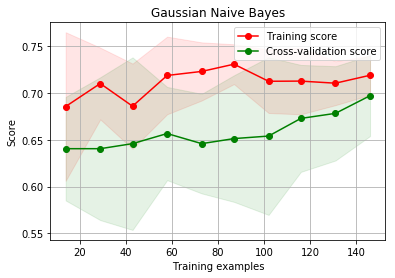

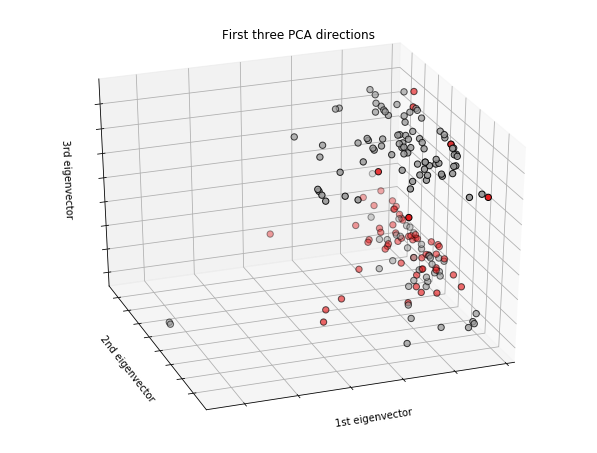

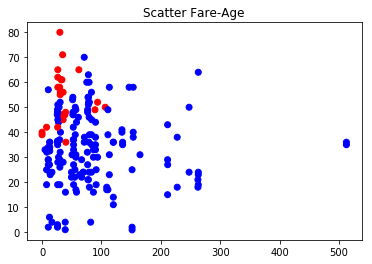

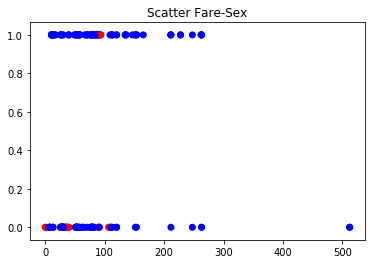

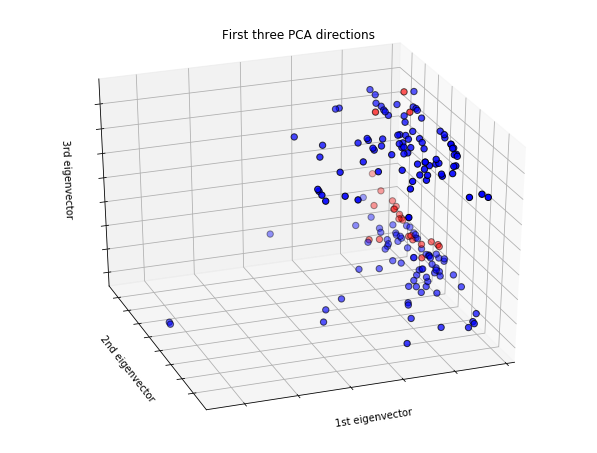

In [33]:
# titanic
#Метод к ближацших соседей

data = pd.read_csv("titanic.csv", sep = ",")
#print(data.describe()) # check if we've loaded right data

data_notna = pd.DataFrame.dropna(data)
#print(data_notna.describe())

X = data_notna[["Pclass", "Fare", "Age", "Sex"]]
X.replace("male", 0, True, None, False)
X.replace("female", 1, True, None, False)
#print(X.loc[:5])

Y = data_notna["Survived"]



color = ["red" if i == 0 else "blue" for i in np.array(Y)]

print("Titanic scatter")

plt.figure()
plt.title("Scatter Pclass-Fare")
plt.scatter(np.array(X.Pclass), np.array(X.Fare), c=color)
plt.show()

plt.figure()
plt.title("Scatter Pclass-Age")
plt.scatter(np.array(X.Pclass), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Pclass-Sex")
plt.scatter(np.array(X.Pclass), np.array(X.Sex), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Age")
plt.scatter(np.array(X.Fare), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Sex")
plt.scatter(np.array(X.Fare), np.array(X.Sex), c=color)
plt.show()

clf =KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)
print(clf.predict(X[:7]))

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)

print("Do they survived?")
n = 1
print(clf.predict(X[5:10]))
print((X[5:11]))

#print(clf.partial_fit)
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Gaussian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


dat = np.array(X)
#print(dat[:, 1:4])

# построение первых трёх измерений 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(dat[:, 1:4])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



z=clf.predict(X)
color = ["red" if i == 0 else "blue" for i in np.array(z)]
plt.figure()
plt.title("Scatter Fare-Age")
plt.scatter(np.array(X.Fare), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Sex")
plt.scatter(np.array(X.Fare), np.array(X.Sex), c=color)
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(dat[:, 1:4])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

-87.13735706089476
    Pclass      Fare   Age  Sex
1        1   71.2833  38.0    1
3        1   53.1000  35.0    1
6        1   51.8625  54.0    0
10       3   16.7000   4.0    1
11       1   26.5500  58.0    1
21       2   13.0000  34.0    0
23       1   35.5000  28.0    0
27       1  263.0000  19.0    0
52       1   76.7292  49.0    1
54       1   61.9792  65.0    0
[ -318.81501096  -394.63852354 -1026.06648177  -344.4523973
  -608.72171219  -315.42271481  -295.69981139  -580.38923958
  -699.61462657  -305.73765565]


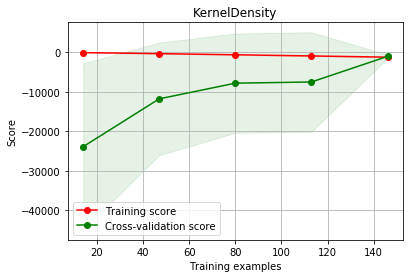

[0.9745     0.94639419 0.27323514 1.01928505 0.96920758]
    Pclass     Fare   Age  Sex
1        1  71.2833  38.0    1
3        1  53.1000  35.0    1
6        1  51.8625  54.0    0
10       3  16.7000   4.0    1
11       1  26.5500  58.0    1
[ 0.74611419  0.3750421   0.34756638  0.64930915  0.08679102  0.45026551
  0.03081006 -0.01539228  0.47109854  0.54798108]


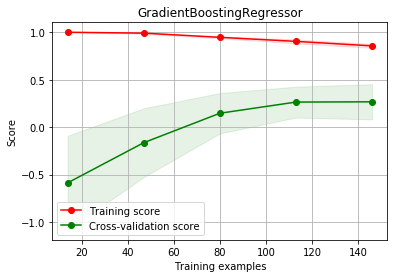

In [35]:
#Метод парзеновского окна

from sklearn.neighbors import KernelDensity

clf=KernelDensity()
clf.fit(X,Y)
print(clf.score(X[:10]))
print((X[:10]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KernelDensity")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


from sklearn.ensemble import GradientBoostingRegressor

# Метод потенциальных функций

clf=GradientBoostingRegressor()
clf.fit(X,Y)
print(clf.predict(X[:5]))
print((X[:5]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("GradientBoostingRegressor")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


Where is malignant cancer?
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M']
     17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  0.2419  \
14  14.540  27.54   96.73   658.8  0.11390  0.15950  0.16390  0.07364  0.2303   
15  14.680  20.13   94.74   684.5  0.09867  0.07200  0.07395  0.05259  0.1586   
16  16.130  20.68  108.10   798.8  0.11700  0.20220  0.17220  0.10280  0.2164   
17  19.810  22.15  130.00  1260.0  0.09831  0.10270  0.14790  0.09498  0.1582   
18  13.540  14.36   87.46   566.3  0.09779  0.08129  0.06664  0.04781  0.1885   
19  13.080  15.71   85.63   520.0  0.10750  0.12700  0.04568  0.03110  0.1967   
20   9.504  12.44   60.34   273.9  0.10240  0.06492  0.02956  0.02076  0.1815   
21  15.340  14.26  102.50   704.4  0.10730  0.21350  0.20770  0.09756  0.2521   
22  21.160  23.04  137.20  1404.0  0.09428  0.10220  0.10970  0.08632  0.1769   

    0.07871  
14  0.07077  
15  0.05922  
16  0.07356  
17  0.05395  
18  0.05766  
19  0.06811  
20  0.06905  
21  0.07032 

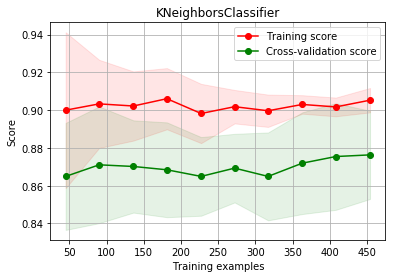

In [38]:
#РАК
# к ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

#nb
data = pd.read_csv("wdbc.data", sep = ",")
data = data.iloc[:,0:12]
#print(data.describe())
X = data.iloc[:,2:12]
Y = data.iloc[:,1]

clf =KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)
#print(clf.predict(X[:7]))

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)

print("Where is malignant cancer?")
n = 1
print(clf.predict(X[14:23]))
print((X[14:23]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

